In [1]:
import pandas as pd 

df = pd.read_csv(r'/Users/ankushs/Desktop/CIBERSORTX/inputfiles/salmon/metadata_updated_FL_ONLY.txt',sep='\t')
df

,Sample_name,WES_sample,Biopsy,Biopsy_type,Group,Annotations,Condition
0,X0001,P1_1,pre,FL,tFL,MF1_1_T_Pre,Malignant
1,X0002,P1_2,relapse,FL,tFL,MF1_2_T_Rel,Malignant
2,X0003,P2_1,pre,FL,nFL,MF2_1_N_Pre,Malignant
3,X0004,P2_2,relapse,FL,nFL,MF2_2_N_Rel,Malignant
4,X0005,P4_1,pre,FL,tFL,MF3_1_T_Pre,Malignant
...,...,...,...,...,...,...,...
82,BC2-Unstim,BC2-Unstim,normal,unstim,Normal,NB2_2_UnStim,Normal
83,BC3-Stim,BC3-Stim,normal,stim,Normal,NB3_1_Stim,Normal
84,BC3-Unstim,BC3-Unstim,normal,unstim,Normal,NB3_2_UnStim,Normal
85,BC4-Stim,BC4-Stim,normal,stim,Normal,NB4_1_Stim,Normal


In [5]:
####FLONLY
#df1 = pd.read_csv(r'/Users/ankushs/Dropbox (UiO)/LymphomaBiology/FL1/FL1_RNASEQ/1_1_CIBERSORTX/CIBERSORTX_SALMON/CIbersortX_local_Hires/LM8_FL_CIBERSORTX_PROTEIN_CODING/CIBERSORTxGEP_protein_coding_fl_Fractions.txt',sep='\t')
#df1 = pd.read_csv(r'/Users/ankushs/Dropbox (UiO)/LymphomaBiology/FL1/FL1_RNASEQ/0_INPUTFILES/2.DOWNSTREAM_INPUT/Cibersortx/Cibersortx_lm8_fractions_proteincoding_tumorpurity_fl_Normal_cohort.csv',sep='\t')
df1 = pd.read_csv(r'/Users/ankushs/Dropbox (UiO)/LymphomaBiology/FL1/FL1_RNASEQ/0_INPUTFILES/2.DOWNSTREAM_INPUT/Cibersortx/Cibersortx_lm4_fractions_proteincoding_tumorpurity_fl_Normal_cohort.csv',sep='\t')

print(df1)

   Mixture   B cells  NK cells  \
0    P23_2  0.740698  0.000000   
1    P75_2  0.739561  0.000000   
2     P9_1  0.717759  0.008987   
3    P42_1  0.715692  0.017488   
4    P48_1  0.711385  0.003757   
..     ...       ...       ...   
59   P44_2  0.280145  0.047512   
60    P3_2  0.271000  0.002265   
61   P25_2  0.249655  0.046739   
62   P42_2  0.214638  0.068061   
63   P41_1  0.180325  0.030219   

    Plasma|Eosinophils|Neutrophils|Mast|Monocytes Macrophages|Dendritic cells  \
0                                            0.175252                           
1                                            0.086399                           
2                                            0.124690                           
3                                            0.127333                           
4                                            0.155055                           
..                                                ...                           
59                      

In [7]:
df2 = pd.read_csv(r'/Users/ankushs/Desktop/tumor_purity_corr/tumor_purity.txt',sep='\t')
df2
tumor_purity_df = (df2.merge(df1, left_on='T_sample_ID', right_on='Mixture')
        .reindex(columns=['T_sample_ID','FASIT_purity','Pyclone_purity','Mixture','B cells','T cells','NK cells','Plasma|Eosinophils|Neutrophils|Mast|Monocytes Macrophages|Dendritic cells']))

tumor_purity_df
tumor_purity_df.to_csv('cibersort_LM4_meta_tumorpurity_ALL_DATA.csv',index=True)
tumor_purity_df

,T_sample_ID,FASIT_purity,Pyclone_purity,Mixture,B cells,T cells,NK cells,Plasma|Eosinophils|Neutrophils|Mast|Monocytes Macrophages|Dendritic cells
0,P1_1,0.594641,0.591,P1_1,0.626051,0.160857,0.007459,0.205633
1,P1_2,0.389490,0.389,P1_2,0.450002,0.212329,0.017699,0.319970
2,P2_1,0.198772,0.158,P2_1,0.387808,0.309315,0.055075,0.247802
3,P2_2,0.630286,0.610,P2_2,0.555050,0.185892,0.000000,0.259058
4,P3_1,0.471196,0.512,P3_1,0.479479,0.225930,0.000000,0.294591
...,...,...,...,...,...,...,...,...
59,P59_1,0.484616,0.477,P59_1,0.436992,0.287345,0.000000,0.275664
60,P61_1,0.297225,0.211,P61_1,0.373744,0.346726,0.000000,0.279531
61,P75_1,0.460488,0.632,P75_1,0.648601,0.253783,0.038578,0.059039
62,P75_2,0.762966,0.736,P75_2,0.739561,0.174040,0.000000,0.086399


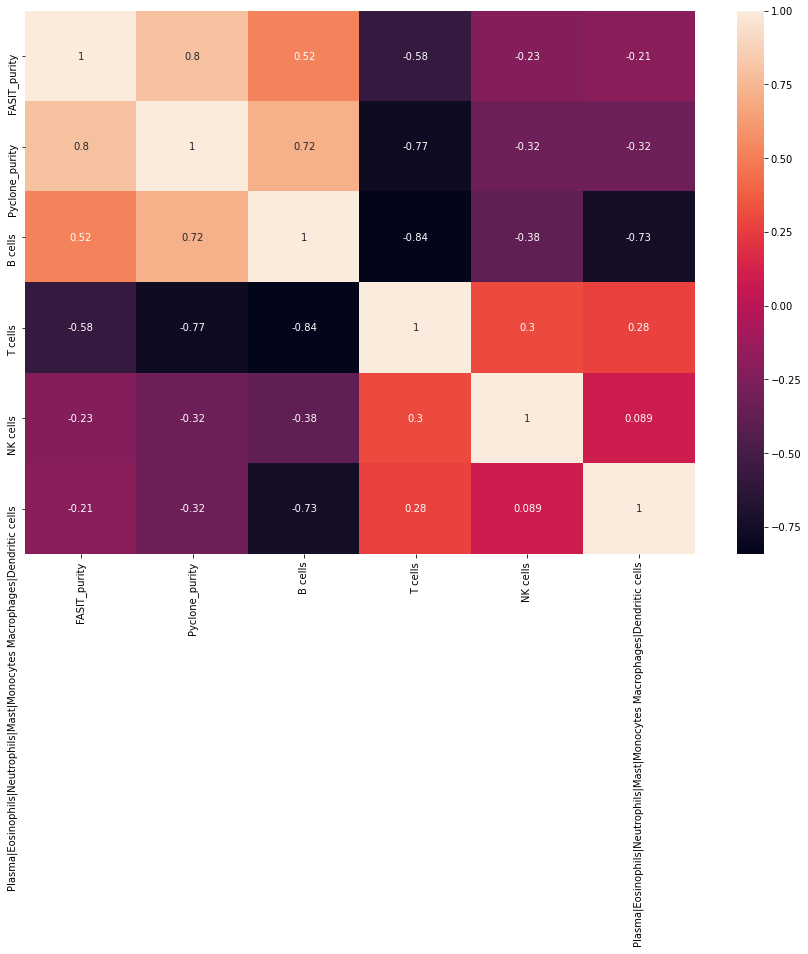

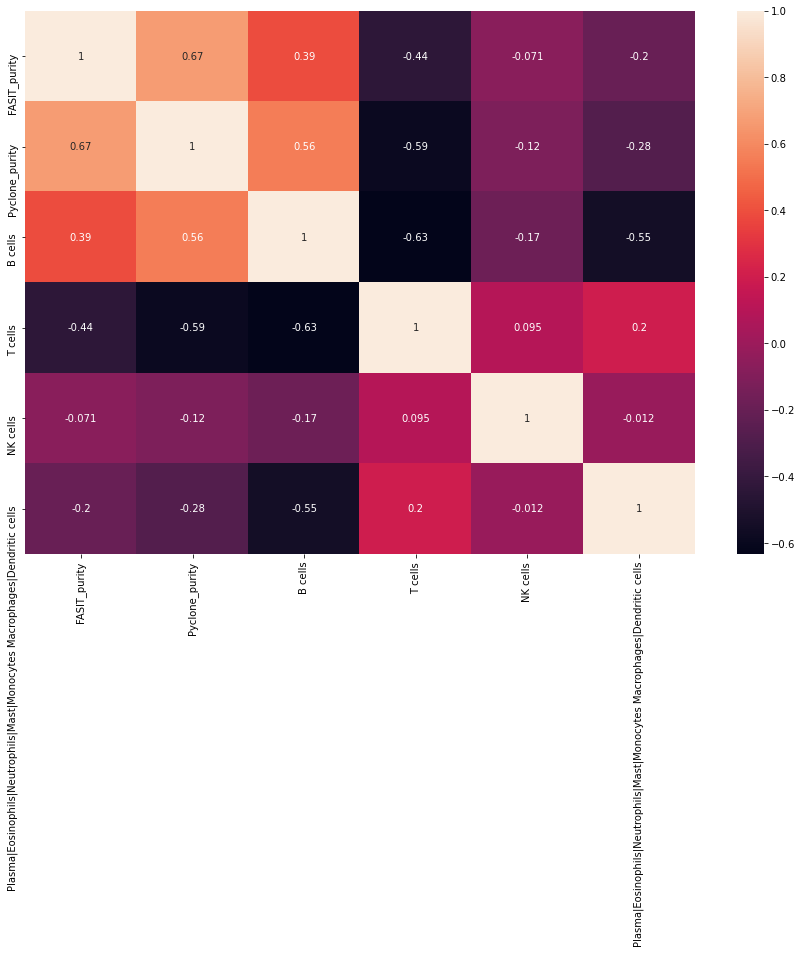

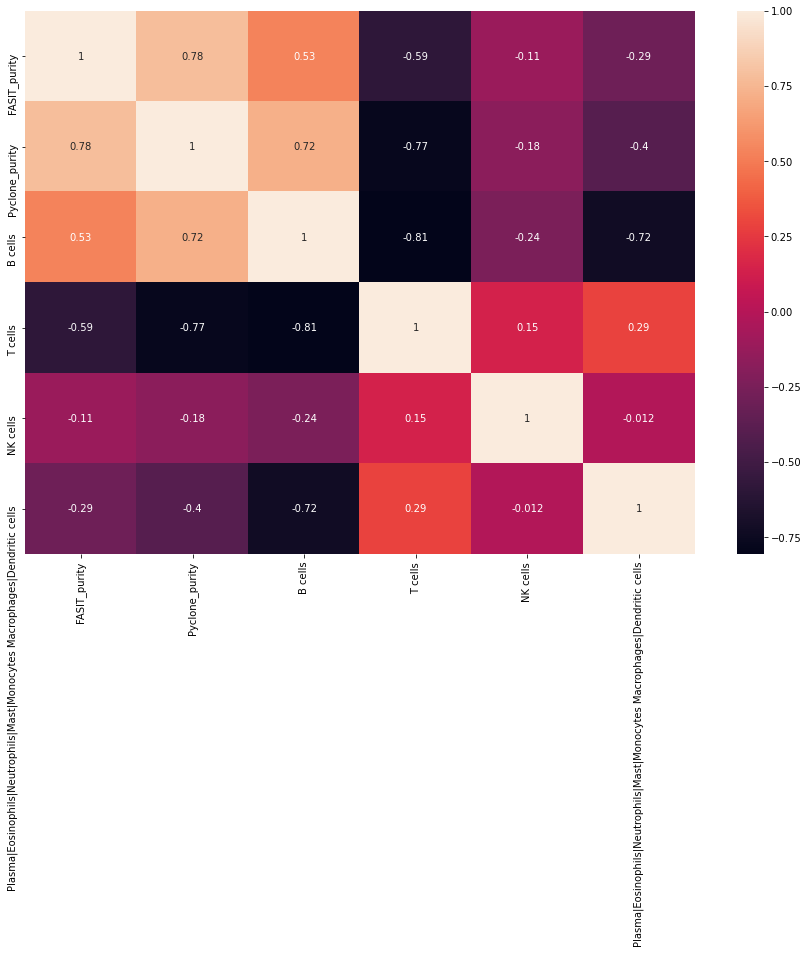

In [8]:
#tumor_purity_df.corr(method ='pearson') 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(tumor_purity_df.corr(method ='pearson'), annot=True)
plt.savefig('LM44_FL_only_tumor_purity_correlation_pearson.pdf')

plt.figure(figsize=(15, 10))
sns.heatmap(tumor_purity_df.corr(method ='kendall'), annot=True)
plt.savefig('LM4_FL_only_tumor_purity_correlation_kendall.pdf')

plt.figure(figsize=(15, 10))
sns.heatmap(tumor_purity_df.corr(method ='spearman'), annot=True)
plt.savefig('LM4_FL_only_tumor_purity_correlation_spearman.pdf')


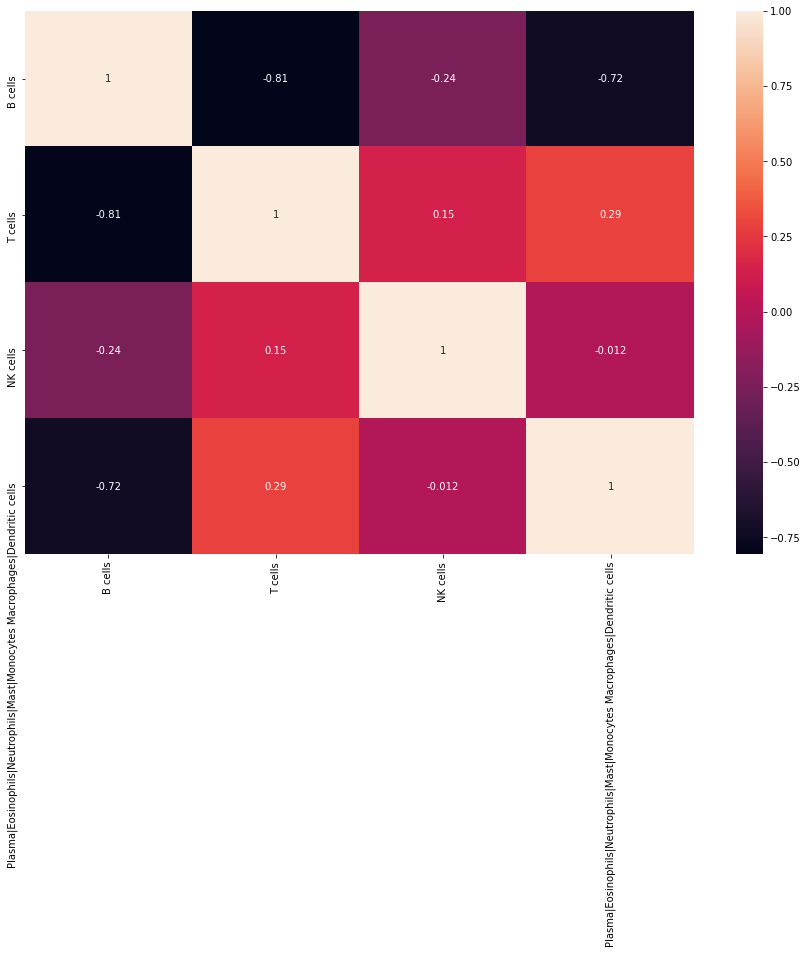

In [10]:
#Only Cibersortx LM8 celltype correlations
cibersort_fractions_df1 = (df2.merge(df1, left_on='T_sample_ID', right_on='Mixture')
          .reindex(columns=['T_sample_ID', 'Mixture','B cells','T cells','NK cells','Plasma|Eosinophils|Neutrophils|Mast|Monocytes Macrophages|Dendritic cells']))
cibersort_fractions_df1.to_csv('LM4_FL_Normal_only_cibersort_tumorpurity.csv',index=False)
plt.figure(figsize=(15, 10))
sns.heatmap(cibersort_fractions_df1.corr(method ='spearman'), annot=True)
plt.savefig('LM4_FL_cibersortx_fraction_correlation_spearman.pdf')

SpearmanrResult(correlation=0.7204001973180145, pvalue=1.938618581022073e-11)

<Figure size 9000x9000 with 0 Axes>

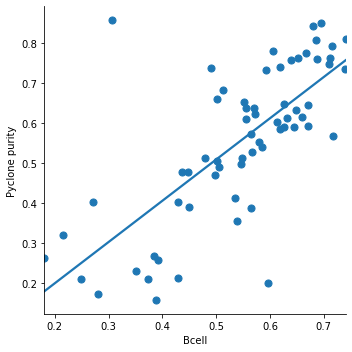

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 15),dpi=600)
#without Regression Shaded
p2=sns.lmplot(x="B cells", y="Pyclone_purity",data=tumor_purity_df,
           ci=None,scatter_kws={"s": 50, "alpha": 1})
#With Regression shaded
#p2=sns.lmplot(x="B cells", y="Pyclone_purity",line_kws = {'color': 'grey'}, data=tumor_purity_df,legend_out=True,);
plt.xlabel("Bcell")
plt.ylabel("Pyclone purity")
p2.fig.tight_layout()
p2=plt.savefig('LM4_FL_Scatterplot_pyclone_purity_cibersortx_BCELL_spearman.pdf')

#Correlation heatmapplot_ all  and Scatterplot
from scipy import stats
stats.spearmanr(tumor_purity_df['B cells'], tumor_purity_df['Pyclone_purity'])

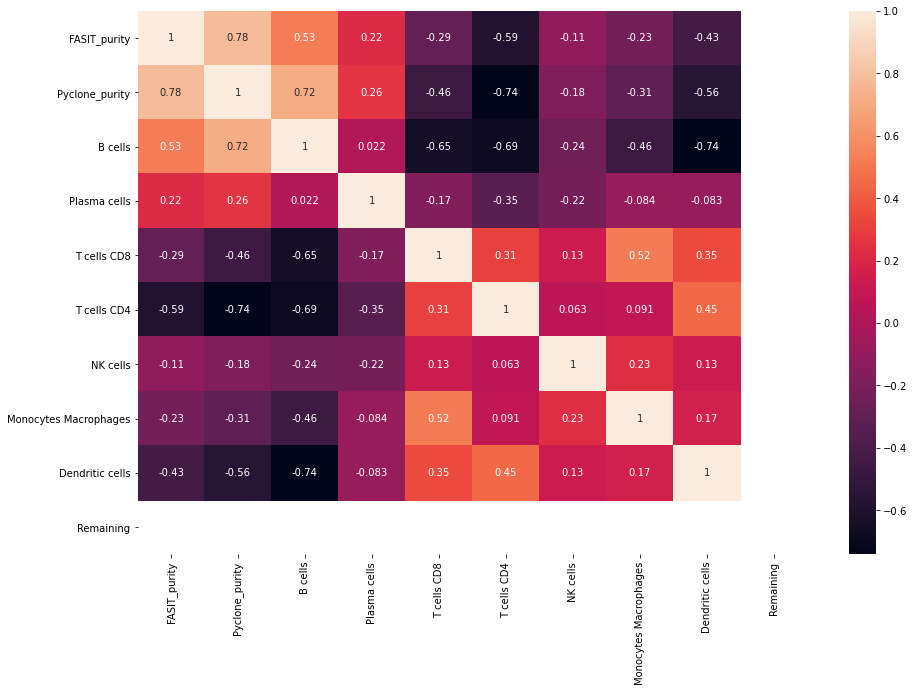

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(tumor_purity_df.corr(method ='spearman'), annot=True)
p1=plt.savefig('LM8_FL_tumor_purity_cibersortx_correlation_spearman.pdf')

#Merge_metadata with fractions and reindexing columns
#out = (df.merge(df1, left_on='WES_sample', right_on='Mixture')
#          .reindex(columns=['Sample_name','RNAseq_sample','WES_sample','Biopsy','Biopsy_type','Group','Condition','Mixture','B cells','Plasma cells','T cells CD8','T cells CD4','T cells follicular helper','T cells regulatory (Tregs)','NK cells','Monocytes Macrophages','Dendritic cells','Remaining']))
#print(out)
#out.to_csv('merged_cibersort_metadata.csv',index=False)
#out.to_csv('merged_cibersort_metadata.csv',index=False)

SpearmanrResult(correlation=0.5287273148545958, pvalue=7.085793889421098e-06)

<Figure size 9000x9000 with 0 Axes>

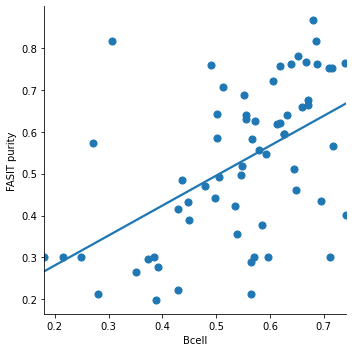

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 15),dpi=600)
#without Regression Shaded
#p2=sns.lmplot(x="B cells", y="Pyclone_purity",data=tumor_purity_df,ci=None,scatter_kws={"s": 50, "alpha": 1})
p2=sns.lmplot(x="B cells", y="FASIT_purity",data=tumor_purity_df,ci=None,scatter_kws={"s": 50, "alpha": 1})

#With Regression shaded
#p2=sns.lmplot(x="B cells", y="FASIT_purity",line_kws = {'color': 'grey'}, data=tumor_purity_df,legend_out=True,);
plt.xlabel("Bcell")
plt.ylabel("FASIT purity")
p2.fig.tight_layout()
#p2=plt.savefig('LM4_FL_Scatterplot_pyclone_purity_cibersortx_BCELL_spearman.pdf')
p2=plt.savefig('LM4_FL_Scatterplot_FASIT_purity_cibersortx_BCELL_spearman.pdf')
#Correlation heatmapplot_ all  and Scatterplot
from scipy import stats
stats.spearmanr(tumor_purity_df['B cells'], tumor_purity_df['FASIT_purity'])